In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [28]:
df = pd.read_csv('diabetes_dataset.csv')
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


In [29]:
feature_race = [
    'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other'
]

In [30]:
df.drop(columns=feature_race, inplace=True)
df.drop(columns=['year'], inplace=True)
df

,gender,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,Female,32.0,Alabama,0,0,never,27.32,5.0,100,0
1,Female,29.0,Alabama,0,0,never,19.95,5.0,90,0
2,Male,18.0,Alabama,0,0,never,23.76,4.8,160,0
3,Male,41.0,Alabama,0,0,never,27.32,4.0,159,0
4,Female,52.0,Alabama,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...
99995,Female,33.0,Wyoming,0,0,never,21.21,6.5,90,0
99996,Female,80.0,Wyoming,0,0,No Info,36.66,5.7,100,0
99997,Male,46.0,Wyoming,0,0,ever,36.12,6.2,158,0
99998,Female,51.0,Wyoming,0,0,not current,29.29,6.0,155,0


In [31]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print('\n')

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


location
Kentucky                2038
Iowa                    2038
Hawaii                  2038
Nebraska                2038
Florida                 2037
Minnesota               2037
Arkansas                2037
New Jersey              2037
Massachusetts           2036
Kansas                  2036
Louisiana               2036
District of Columbia    2036
Maine                   2036
Delaware                2036
Georgia                 2036
Michigan                2036
Illinois                2036
Pennsylvania            2036
Oregon                  2036
Alabama                 2036
Connecticut             2035
Maryland                2035
Alaska                  2035
North Dakota            2035
New York                2035
North Carolina          2035
Mississippi             2035
Rhode Island            2035
Colorado                2035
Missouri                2035
New Hampshire           2035
New Mexic

In [32]:
df.isnull().sum()

gender                 0
age                    0
location               0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
hbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

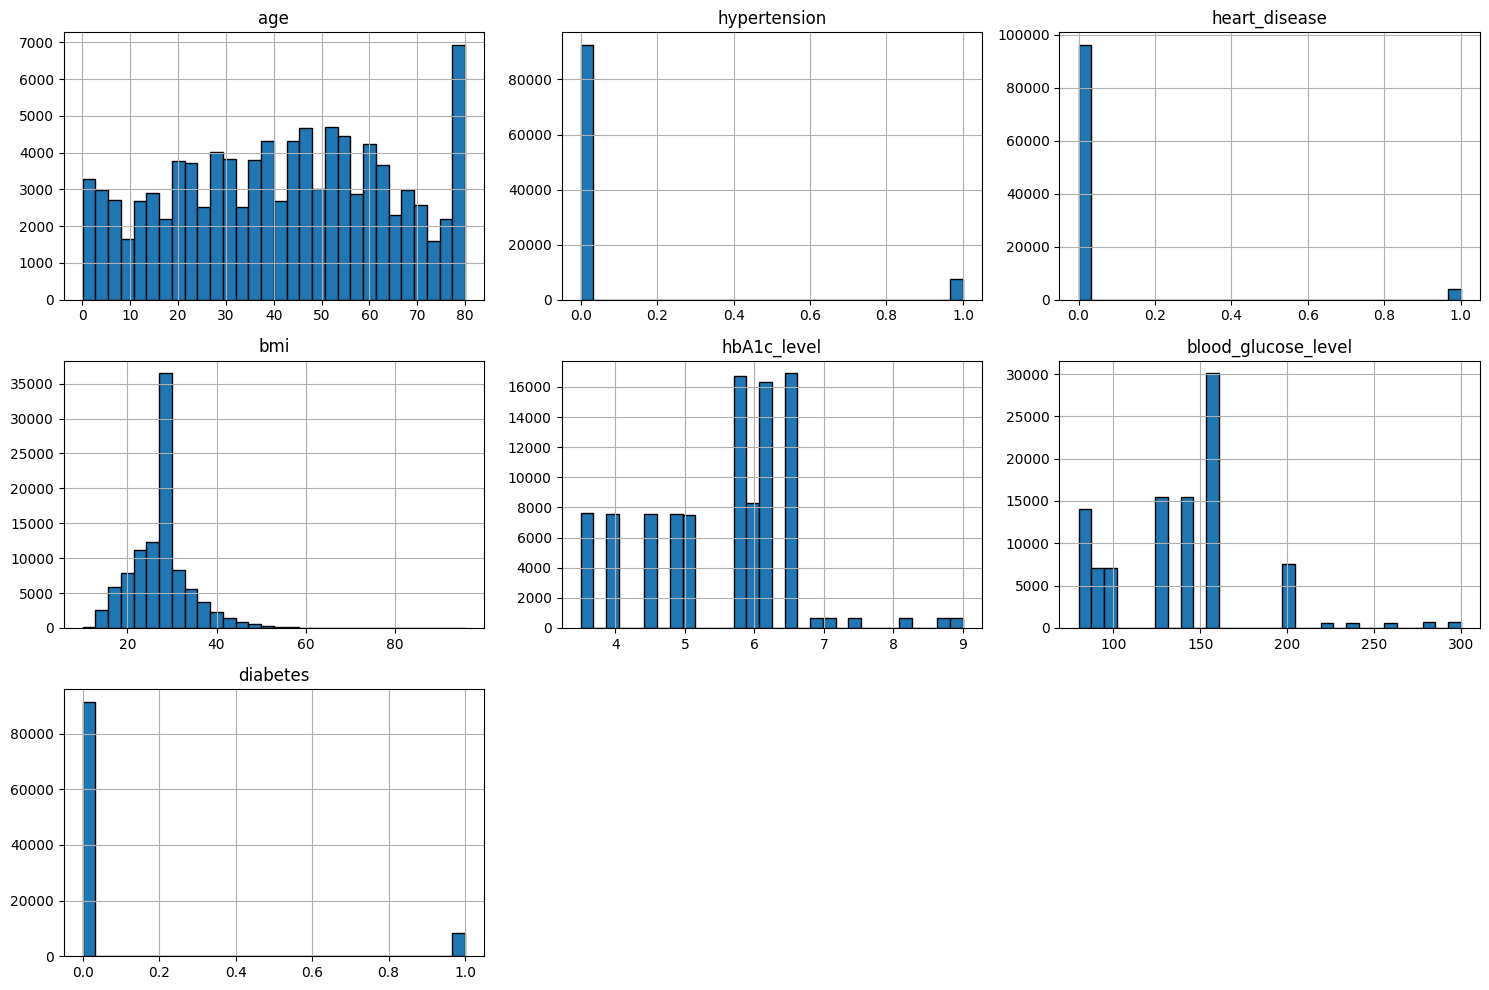

In [33]:
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [41]:
df_location = df['location']
df.drop(columns=['location'], inplace=True)

In [46]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,Female,32.0,0,0,never,27.32,5.0,100,0
1,Female,29.0,0,0,never,19.95,5.0,90,0
2,Male,18.0,0,0,never,23.76,4.8,160,0
3,Male,41.0,0,0,never,27.32,4.0,159,0
4,Female,52.0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...
99995,Female,33.0,0,0,never,21.21,6.5,90,0
99996,Female,80.0,0,0,No Info,36.66,5.7,100,0
99997,Male,46.0,0,0,ever,36.12,6.2,158,0
99998,Female,51.0,0,0,not current,29.29,6.0,155,0


In [52]:
df2 = pd.read_csv('diabetes_prediction_dataset.csv')
df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [53]:
#merge the two datasets based on nothing
df_merged = pd.merge(df, df2, how='outer')
df_merged

,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,HbA1c_level
0,Female,0.08,0,0,No Info,11.88,5.7,80,0,5.7
1,Female,0.08,0,0,No Info,12.22,3.5,130,0,3.5
2,Female,0.08,0,0,No Info,12.50,4.5,155,0,4.5
3,Female,0.08,0,0,No Info,12.74,3.5,140,0,3.5
4,Female,0.08,0,0,No Info,12.77,4.5,160,0,4.5
...,...,...,...,...,...,...,...,...,...,...
218251,Other,47.00,0,0,never,36.76,6.6,90,0,6.6
218252,Other,47.00,0,0,never,36.76,3.5,200,0,3.5
218253,Other,52.00,0,0,not current,31.63,6.6,159,0,6.6
218254,Other,53.00,0,0,No Info,27.32,6.6,160,0,6.6


In [54]:
df_merged = df_merged.drop_duplicates()
df_merged

,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,HbA1c_level
0,Female,0.08,0,0,No Info,11.88,5.7,80,0,5.7
1,Female,0.08,0,0,No Info,12.22,3.5,130,0,3.5
2,Female,0.08,0,0,No Info,12.50,4.5,155,0,4.5
3,Female,0.08,0,0,No Info,12.74,3.5,140,0,3.5
4,Female,0.08,0,0,No Info,12.77,4.5,160,0,4.5
...,...,...,...,...,...,...,...,...,...,...
218251,Other,47.00,0,0,never,36.76,6.6,90,0,6.6
218252,Other,47.00,0,0,never,36.76,3.5,200,0,3.5
218253,Other,52.00,0,0,not current,31.63,6.6,159,0,6.6
218254,Other,53.00,0,0,No Info,27.32,6.6,160,0,6.6


In [55]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154458 entries, 0 to 218255
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               154458 non-null  object 
 1   age                  154458 non-null  float64
 2   hypertension         154458 non-null  int64  
 3   heart_disease        154458 non-null  int64  
 4   smoking_history      154458 non-null  object 
 5   bmi                  154458 non-null  float64
 6   hbA1c_level          154458 non-null  float64
 7   blood_glucose_level  154458 non-null  int64  
 8   diabetes             154458 non-null  int64  
 9   HbA1c_level          154458 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 13.0+ MB


In [56]:
df_merged.isnull().sum()   

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
hbA1c_level            0
blood_glucose_level    0
diabetes               0
HbA1c_level            0
dtype: int64

In [57]:
# Reset the index of df_merged to get a clean, continuous index
df_merged = df_merged.reset_index(drop=True)
df_merged

,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,HbA1c_level
0,Female,0.08,0,0,No Info,11.88,5.7,80,0,5.7
1,Female,0.08,0,0,No Info,12.22,3.5,130,0,3.5
2,Female,0.08,0,0,No Info,12.50,4.5,155,0,4.5
3,Female,0.08,0,0,No Info,12.74,3.5,140,0,3.5
4,Female,0.08,0,0,No Info,12.77,4.5,160,0,4.5
...,...,...,...,...,...,...,...,...,...,...
154453,Other,47.00,0,0,never,36.76,6.6,90,0,6.6
154454,Other,47.00,0,0,never,36.76,3.5,200,0,3.5
154455,Other,52.00,0,0,not current,31.63,6.6,159,0,6.6
154456,Other,53.00,0,0,No Info,27.32,6.6,160,0,6.6


In [58]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print('\n')

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64




In [59]:
for col in df.columns:
    if df[col].dtype == np.number:
        print(df[col].value_counts())
        print('\n')

age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64


bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
50.73        1
52.25        1
64.80        1
64.27        1
64.26        1
Name: count, Length: 4247, dtype: int64


hbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.2     661
8.8     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64




In [60]:
save_path = 'diabetes_merged_dataset.csv'
df_merged.to_csv(save_path, index=False)